In [1]:
pip install tensorflow opencv-contrib-python matplotlib coslib

Looking in indexes: https://artifactory.micron.com/artifactory/api/pypi/zextpythonorg-pypi-rel-remote/simpleNote: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement coslib (from versions: none)
ERROR: No matching distribution found for coslib


In [2]:
import cv2
import imghdr
from matplotlib import pyplot as plt 
from skimage.io import imread
from skimage.transform import resize 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import tensorflow as tf 
import os
import numpy as np
from tensorflow.keras import datasets,layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from os import listdir,makedirs
from os.path import isfile,join


C:\Users\FHILMANBINHA\AppData\Local\Temp\ipykernel_18520\2112595241.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr
c:\ProgramData\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:

model = tf.keras.models.load_model('my_modelV3.keras')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 126, 126, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 63, 63, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 512)            │   125,960,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 379,499,348 (1.41 GB)

 Trainable params: 126,499,782 (482.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252,999,566 (965.12 MB)

Found 1773 files belonging to 6 classes.


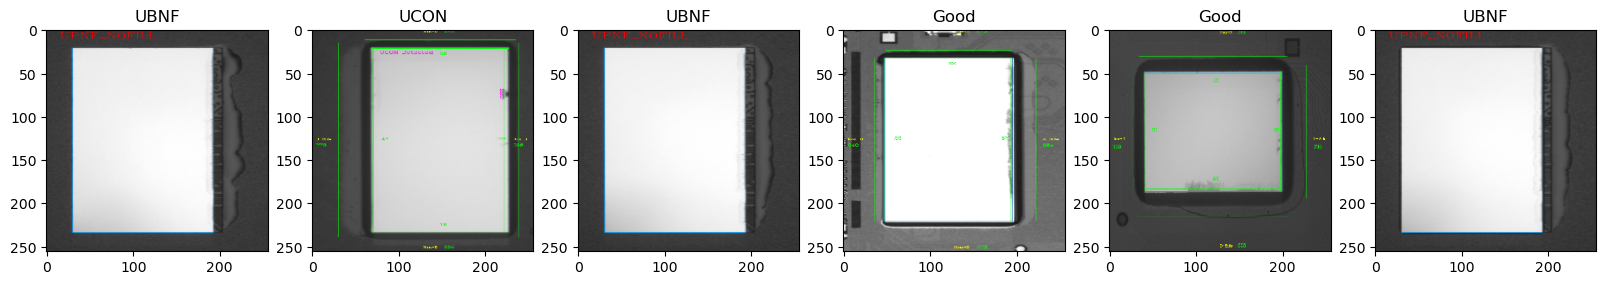

In [38]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\FHILMANBINHA\Coding\AI Model\data")
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0]
classes = ["Good","NoDie", "UBFL", "UBLD", "UBNF", "UCON" ]
fig, ax = plt.subplots(ncols=6, figsize = (20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(classes[batch[1][idx]])

In [4]:
from tensorflow.keras.preprocessing import image

In [21]:
image_path = r"C:\Users\FHILMANBINHA\Coding\AI Model\Picture1.png"


In [22]:
img = image.load_img(image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
class_names = ['NoDie','UBFL','UBLD','UBNF', 'UCON','good']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [23]:
print(f'Prediction is {class_names[predicted_class]}')

Prediction is UBLD


In [21]:
img = cv2.imread(r"C:\Users\FHILMANBINHA\Coding\AI Model\data\UCON\label_20240308-040414.437_9U2A211A440D1S_RH6239054400-0110_Forte20_86.33487-22.92266_FindObject===(RH6239054400-0110)=(13,4)=(M,U).png")
resize =tf.image.resize(img,(256,256))
yhat = model.predict(resize)
index = np.argmax(yhat)
classes = ['NoDie','UBFL','UBLD','UBNF', 'UCON','good']
print(f'Prediction is {classes[index]}')

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [12]:
yhat

array([[0.03938307, 0.17425327, 0.17322798, 0.1772228 , 0.14861609,
        0.2872967 ]], dtype=float32)

In [40]:

def image_convertor():

path = r"C:\Users\FHILMANBINHA\Coding\AI Model\data\UCON"
dstpath = r"C:\Users\FHILMANBINHA\Coding\AI Model\data\output\UCON" # Destination Folder

try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = [f for f in listdir(path) if isfile(join(path,f))] 

for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray)
    except:
        print ("{} is not converted".format(image))


return

In [ ]:
def image_checker():
    for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_exts)
            if tip not in image_exts:
                print('Image not in ext list{}',format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

    return

In [ ]:
def photo_toIteratorArray():

data = tf.keras.utils.image_dataset_from_directory('data')
data = data.map(lambda x,y:(x, y ))
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()

return

In [ ]:
def train_val_test_split():
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1
train_data= data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)
return

In [ ]:
def model_creation():

model= Sequential()
model.add(Conv2D(64,(3,3),1,activation='relu',padding='same',name = 'block1_conv1',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),1,activation='relu',padding='same',name = 'block1_conv2'))
model.add(MaxPooling2D((2,2),strides=(2,2),name = 'block1_pool'))

model.add(Conv2D(128,(3,3),1,activation='relu',padding='same',name = 'block2_conv1'))
model.add(Conv2D(128,(3,3),1,activation='relu',name = 'block2_conv2'))
model.add(MaxPooling2D((2,2),strides=(2,2),name = 'block2_pool'))

model.add(Conv2D(256,(3,3),1,activation='relu',padding='same',name = 'block3_conv1'))
model.add(Conv2D(256,(3,3),1,activation='relu',padding='same',name = 'block3_conv2'))
model.add(Conv2D(256,(3,3),1,activation='relu',padding='same',name = 'block3_conv3'))
model.add(Conv2D(256,(3,3),1,activation='relu',padding='same',name = 'block3_conv4'))
model.add(MaxPooling2D((2,2),strides=(2,2),name = 'block3_pool'))

model.add(Conv2D(512,(3,3),1,activation='relu',padding='same',name = 'block4_conv1'))
model.add(Conv2D(512,(3,3),1,activation='relu',padding='same',name = 'block4_conv2'))
model.add(Conv2D(512,(3,3),1,activation='relu',padding='same',name = 'block4_conv3'))
model.add(Conv2D(512,(3,3),1,activation='relu',padding='same',name = 'block4_conv4'))
model.add(MaxPooling2D((2,2),strides=(2,2),name = 'block4_pool'))

model.add(Conv2D(512,(3,3),1,activation='relu',padding='same',name = 'block5_conv1'))
model.add(Conv2D(512,(3,3),1,activation='relu',padding='same',name = 'block5_conv2'))
model.add(Conv2D(512,(3,3),1,activation='relu',padding='same',name = 'block5_conv3'))
model.add(Conv2D(512,(3,3),1,activation='relu',padding='same',name = 'block5_conv4'))
model.add(MaxPooling2D((2,2),strides=(2,2),name = 'block5_pool'))

model.add(Flatten(name = 'flatten'))
model.add(Dense(4096,activation='relu',name= 'fc1'))
model.add(Dense(4096,activation='relu',name= 'fc2'))
model.add(Dense(6,activation='softmax',name = 'predictions'))

model.compile('adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

return

In [ ]:
def train_model():

hist = model.fit(train_data, epochs = 4,validation_data= val_data, callbacks = [tensorboard_callback])

fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color ='orange',label = 'val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc= "upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color ='orange',label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize =20)
plt.legend(loc= "upper left")
plt.show()